In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Let's start with a home made RNG.

It will be of the <a href="https://en.wikipedia.org/wiki/Linear_congruential_generator">linear congruential generator variety</a>.

$X_{n+1} = (aX_n + c) \mod m$

In [2]:
def rng(size = 10, seed = 1, m = 2**32, a = 1664525, c = 1013904223):
    rng_current = seed
    uni_rns = np.zeros((size))
    for i in range(size):
        rng_current = (a * rng_current + c) % m
        uni_rns[i] = rng_current/m
    return uni_rns

In [3]:
rng(12)

array([0.23645553, 0.36927067, 0.50424203, 0.70488326, 0.05054363,
       0.36951835, 0.77476296, 0.55618857, 0.01649324, 0.63924604,
       0.25045114, 0.42237777])

In [4]:
# Lets get us a 100000 samples from Uniform(0,1). The seed is 42
u = rng(100000, 42)

Do these numbers *immitate* immitate a sample from *Uniform(0,1)*? 

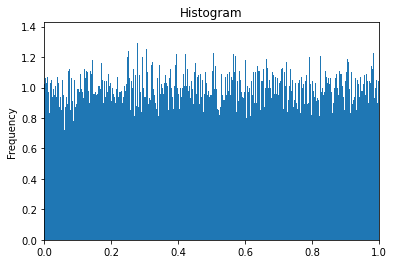

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist(u, density=True, bins=1000, label="Data")
llim = 0
rlim = 1
ax.set_xlim(llim, rlim)
ax.set_ylabel('Frequency')
ax.set_title("Histogram");

Lets sample from the Cauchy distribution using the inverse cdf method

In [6]:
# Here are the 100000 Cauchy samples obtained through the inverse cdf
x = np.tan(np.pi*(u - 0.5))

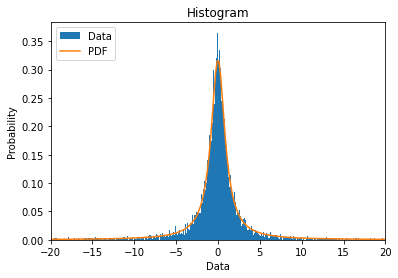

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, range=(-20, 20), density=True, bins=5000, label="Data")
llim = -20
rlim = 20
ax.set_xlim(llim, rlim)
ticks = np.linspace(llim, rlim, 200)
rv = st.cauchy()
ax.plot(ticks, rv.pdf(ticks), label="PDF", color='tab:orange')
ax.legend(loc="upper left")
ax.set_ylabel('Probability')
ax.set_xlabel('Data')
ax.set_title("Histogram");

Using our RNG, set up an inverse sampling procedure for a RV for which you have an expression for the pdf and for the cdf. Show how the pdf 'hugs' the histogram of sampled values.


Next, use the official <a href="https://numpy.org/doc/stable/reference/random/generator.html">Numpy RNG</a> to repeat these steps. Does the official RNG do visibly better?